### Práctica SVC

#### Con el mismo set de datos que en el ejemplo, crea un modelo SVC radial y compara los resultados con el lineal del ejemplo.



####  Además, dibuja los vectores de soporte, los márgenes y la línea divisoria del modelo.¶

#### Cargamos las librerías necesarias

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#### Creamos y visualizamos el set de datos

In [2]:
# Datos
# ==============================================================================
df = pd.read_csv("ejemplo_dataset.csv")
df.head()


,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


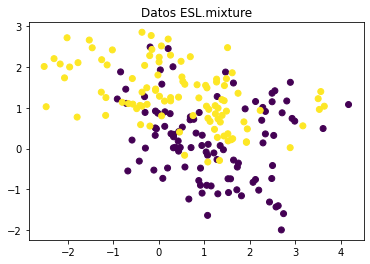

In [3]:
plt.scatter (df.X1, df.X2, c=df["y"])
plt.title("Datos ESL.mixture")

plt.show()

#### Dividimos los datos en el set de entrenamiento y de test.

In [4]:
X = df.drop(columns = 'y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                    )

#### Creamos y entrenamos el modelo SVC lineal.

In [5]:
svc = SVC(C = 1, kernel = 'linear', random_state=123)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=123)

#### Clasificamos con el algoritmo entrenado los datos de test.

In [6]:
svc_lin_pred = svc.predict(X_test)
svc_lin_pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [7]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [8]:
conf_matrix = metrics.confusion_matrix (y_test, svc_lin_pred)

conf_matrix

array([[13,  4],
       [ 8, 15]], dtype=int64)

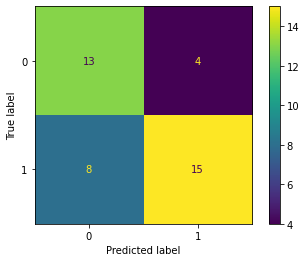

In [9]:
plot_confusion_matrix (svc, X_test, y_test)

#### Creamos el modelo SVC rfb

In [10]:
svc_rbf = SVC (kernel = "rbf", C = 1, gamma = 0.1)
svc_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [11]:
svc_rbf_pred = svc_rbf.predict(X_test)

In [12]:
conf_matrix = metrics.confusion_matrix (y_test, svc_rbf_pred)

conf_matrix

array([[12,  5],
       [ 8, 15]], dtype=int64)

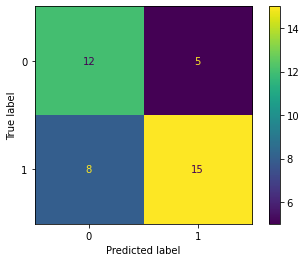

In [13]:
plot_confusion_matrix (svc_rbf, X_test, y_test)

#### Graficamos la linea de decisión, los margenes y los vectores de soporte

https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0

Para encontrar la ecuación de la recta que buscamos:

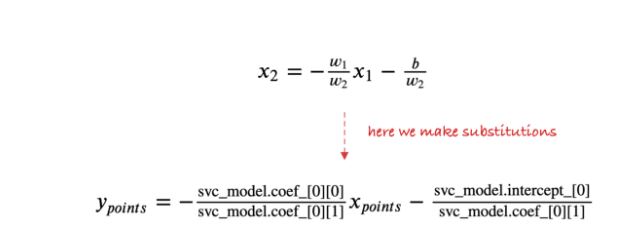

In [14]:
svc.coef_, svc.intercept_

(array([[-0.21534005,  1.23252269]]), array([-0.82686943]))

In [15]:
# Construimos el hiperplano usando la fórmula
w = svc.coef_[0]           # w está formado por 2 elementos w1 y w2
b = svc.intercept_[0]      # b es un elemento
x_puntos = np.linspace(-2, 4, 100)    # generación de puntos x desde -2 a 4
y_puntos = -(w[0] / w[1]) * x_puntos - b / w[1]  # generación de los puntos y correspondientes


In [16]:
w[0]

-0.21534005377953114

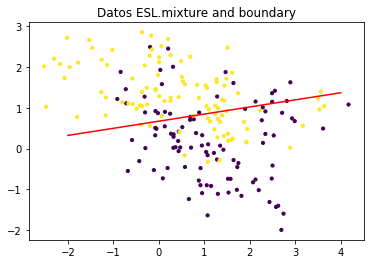

In [17]:
plt.scatter (df.X1, df.X2, c=df["y"], s = 10)
plt.plot (x_puntos, y_puntos, "r")
plt.title("Datos ESL.mixture and boundary")
plt.show()

Calculamos el vector unitario w_hat (Para hallar un vector unitario a partir de cualquier vector, hay que dividir este último por su módulo.)

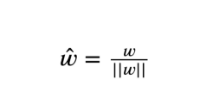

In [18]:
w_hat = svc.coef_[0] / (np.sqrt(np.sum(svc.coef_[0] ** 2)))
w_hat

array([-0.17210781,  0.98507812])

Calculamos el margen con la siguiente fórmula:

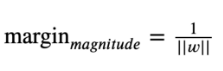

In [19]:
margen = 1 / np.sqrt(np.sum(svc.coef_[0] ** 2))
margen

0.7992373108703184

In [20]:
puntos_borde_decision = np.array(list(zip(x_puntos, y_puntos)))
puntos_linea_sup = puntos_borde_decision + w_hat * margen
puntos_linea_inf = puntos_borde_decision - w_hat * margen

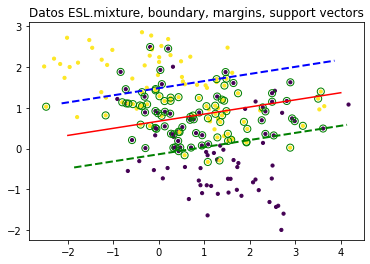

In [21]:
plt.scatter (df.X1, df.X2, c=df["y"], s = 10)

# Borde de decisión (linea divisoria)
plt.plot (x_puntos, y_puntos, "r" )


# vectores soporte (marcados con un borde verde)
plt.scatter(svc.support_vectors_[:, 0],
            svc.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='g', 
            alpha= 1);

# Margen azul linea superior
plt.plot(puntos_linea_sup [:, 0], 
         puntos_linea_sup [:, 1], 
         'b--', 
         linewidth=2)
# Margen verde linea inferior
plt.plot(puntos_linea_inf [:, 0], 
         puntos_linea_inf [:, 1], 
         'g--',
         linewidth=2)
plt.title("Datos ESL.mixture, boundary, margins, support vectors")

plt.show()